**Question 1**

Explain the following question answer in detail:

Q: You are doing full batch gradient descent using the entire training set (not stochastic gradient descent), Is it necessary to shuffle the training data? Explain your answer.

A: It is not necessary. Each iteration of full batch gradient descent runs through the entire dataset and therefore order of dataset does not matter.

In batch gradient descent each iteration has mean of all gradients, here shuffling doesn't help as mean of shuffled or unshuffled both are the same.
In contrast Stochastic Gradient descent takes gradient of each element and updates the value, here shuffling helps, as in the scenario where data is sorted in some form, it will lead to erroneous results.

**Question 2**

Implement Gradient Descent in a Jupyter Notebook. Also explain in the same file how tuning each hyperparameter changes the outcome?

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import random

In [2]:
#Function in order to generate data

def generate_data(m, c, n, std_dev):
    X = np.random.randn(n) * (std_dev/2)  
    e = np.random.randn(n) * std_dev
    Y = m * X + c + e
    return X,Y

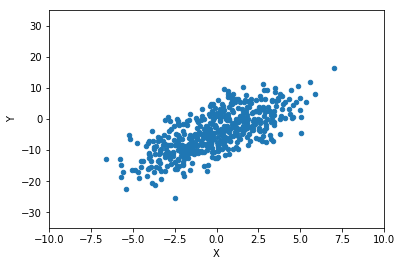

In [3]:
#Setting up some limits to generate data, useful later when setting the limits for graph

m_max = 2 
c_max = 5
c = random.randint(-1*c_max,c_max)
m = random.randint(1,m_max)

dataset_size = 500
std_dev = 5

X, Y = generate_data(m, c, dataset_size, std_dev)
df = pd.DataFrame({'X': X,'Y': Y})

df.plot(kind = 'scatter', x = 'X', y = 'Y')

y_limit = m_max*(std_dev*1.5) + c_max + (std_dev*3)
x_limit = 2*std_dev

plt.ylim([-1*y_limit,y_limit])
plt.xlim([-1*x_limit,x_limit])

plt.show()

**Batch Gradient Descent**

In [4]:
def mean_squared_error(X,Y,w,b):
    m = X.shape[0]
    squared_error = 0
    for i in range(m) :
        squared_error = squared_error + (w*X[i]+b-Y[i])**2
    return (squared_error/m)   

def gradient_w(X,Y,w,b):
    m = X.shape[0]
    delta = 0
    for i in range(m) :
        delta = delta + (w*X[i]+b-Y[i])*X[i]
    return (delta/m)

def gradient_b(X,Y,w,b):
    m = X.shape[0]
    delta = 0
    for i in range(m) :
        delta = delta + (w*X[i]+b-Y[i])    
    return (delta/m)

def gradient_descent(w, b, X, Y, iterations = 1000,learning_rate = 0.01 ):
    #print(mean_squared_error(X,Y,w,b))
    #print(w," ",b)
    error = np.array([mean_squared_error(X,Y,w,b)])
    for i in range(iterations):
        g_w = gradient_w(X,Y,w,b)
        g_b = gradient_b(X,Y,w,b)
        w = w - learning_rate*g_w
        b = b - learning_rate*g_b
        
        error = np.append(error,mean_squared_error(X,Y,w,b))
        
        #print(mean_squared_error(X,Y,w,b))
        #print(w," ",b)   
    
    return w,b,error

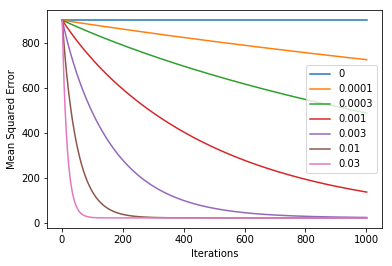

In [5]:
#Randomly generated initial values
w_o = random.randint(-5 * m_max, 5 * m_max)
b_o = random.randint(-5*c_max,5*c_max)

iters = 1000
rate = [0,0.0001,0.0003,0.001,0.003,0.01,0.03]

for alpha in rate : 
    w_b,b_b,mse = gradient_descent(w_o, b_o, X, Y, iters, alpha)
    iterations = np.arange(1, mse.size+1)
    plt.plot(iterations,mse,label = alpha)

plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")

plt.legend()
plt.show()

In [6]:
print("Expectation")
print("m = ",m,", c = ",c)
print("Its MSE =",mean_squared_error(X,Y,m,c))

print("Reality")
print("w_batch = ",w_b,", b_batch = ",b_b)
print("Its MSE =",mean_squared_error(X,Y,w_b,b_b))

if (mean_squared_error(X,Y,w_b,b_b)<mean_squared_error(X,Y,m,c)):
    print("\nWe got a better fit")

Expectation
m =  2 , c =  -4
Its MSE = 22.30737059690043
Reality
w_batch =  2.017663862663738 , b_batch =  -4.043811280461126
Its MSE = 22.303535864321862

We got a better fit


**Stochastic Gradient Descent**

In [7]:
def mean_squared_error(X,Y,w,b):
    m = X.shape[0]
    squared_error = 0
    for i in range(m) :
        squared_error = squared_error + (w*X[i]+b-Y[i])**2
    return (squared_error/m)   

def gradient_w(x,y,w,b):
    delta = (w*x+b-y)*x
    return delta

def gradient_b(x,y,w,b):
    delta = (w*x+b-y)
    return delta

X.view()
def gradient_descent(w, b, X, Y,  learning_rate = 0.01 ):
    #print(mean_squared_error(X,Y,w,b))
    #print(w," ",b)
    error = np.array([mean_squared_error(X,Y,w,b)])
    for i in range(dataset_size):
        g_w = gradient_w(X[i],Y[i],w,b)
        g_b = gradient_b(X[i],Y[i],w,b)
        w = w - learning_rate*g_w
        b = b - learning_rate*g_b

        error = np.append(error,mean_squared_error(X,Y,w,b))

        #print(mean_squared_error(X,Y,w,b))
        #print(w," ",b)   
    
    return w,b,error

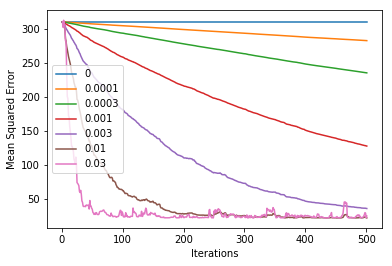

In [8]:
#Randomly generated initial values
w_o = random.randint(-5 * m_max, 5 * m_max)
b_o = random.randint(-5*c_max,5*c_max)


rate = [0,0.0001,0.0003,0.001,0.003,0.01,0.03]

for alpha in rate : 
    w_s,b_s,mse = gradient_descent(w_o, b_o, X, Y,  alpha)
    iterations = np.arange(1, mse.size+1)
    plt.plot(iterations,mse,label = alpha)
    
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")

plt.legend()
plt.show()

In [9]:
print("Expectation")
print("m = ",m,", c = ",c)
print("Its MSE =",mean_squared_error(X,Y,m,c))

print("Reality")
print("w_stochastic = ",w_s,", b_stochastic = ",b_s)
print("Its MSE =",mean_squared_error(X,Y,w_s,b_s))

if (mean_squared_error(X,Y,w_s,b_s)<mean_squared_error(X,Y,m,c)):
    print("\nWe got a better fit")

Expectation
m =  2 , c =  -4
Its MSE = 22.30737059690043
Reality
w_stochastic =  1.3191890498467402 , b_stochastic =  -3.9360503823596047
Its MSE = 25.096400215812817


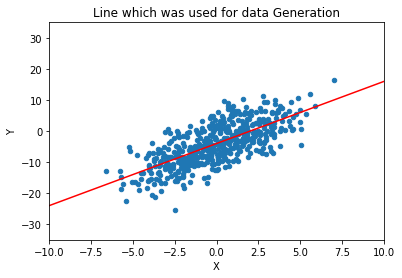

In [10]:

df.plot(kind = 'scatter', x = 'X', y = 'Y')
a = np.linspace((-1*x_limit), x_limit, 100)
b = m*a + c
plt.plot(a, b, color = "red")

plt.title("Line which was used for data Generation")

plt.ylim([-1*y_limit,y_limit])
plt.xlim([-1*x_limit,x_limit])

plt.show()

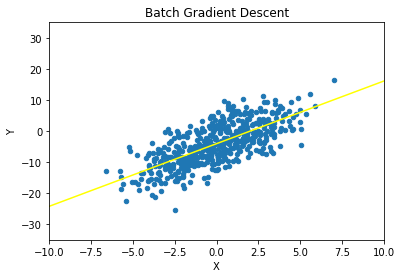

In [11]:

df.plot(kind = 'scatter', x = 'X', y = 'Y')
a = np.linspace((-1*x_limit), x_limit, 100)
b = w_b*a + b_b

plt.plot(a, b, color = "yellow")

plt.title("Batch Gradient Descent")

plt.ylim([-1*y_limit,y_limit])
plt.xlim([-1*x_limit,x_limit])

plt.show()

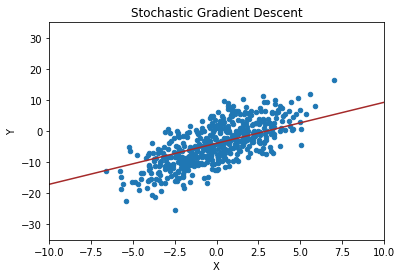

In [12]:

df.plot(kind = 'scatter', x = 'X', y = 'Y')
a = np.linspace((-1*x_limit), x_limit, 100)
b = w_s*a + b_s

plt.plot(a, b, color = "brown")

plt.title("Stochastic Gradient Descent")

plt.ylim([-1*y_limit,y_limit])
plt.xlim([-1*x_limit,x_limit])

plt.show()

**Question 3**

Go through first 2 chapters of ISLR. Now, explain Bias-Variance tradeoff in detail.

Firstly we define the terms Bias and Variance
The average value of Mean Squared Error consists of three terms, variance of the predicted value, square of bias of the predicted value and finally variance of random error(the last being constant)

Bias refers to the error that we get by using simple methods to predicted a much complicated problem. For instance, if a cubic equation is used to generate data, then using a linear equation to predict values will always give a significant error(here called bias)

Variance on the other end, is the error which comes when a prediction model is used to predict a new data set. This ideally should not happen, but when a very flexible model is used then the model adjust itself to pickup on the third type of error(which is regular noise, occurs because of lack of data, lack of parameters or some factors like that) this error should ideally be outside our prediction model.

When flexibility of prediction model and MSE on test data is plotted on XY axes, then we normally get a U shaped curve. This curve has as mentioned before three components, one of them is constant(random error) the other two being, bias which decreases as flexibility increases and variance which increases as flexibility increases. These two oppposite factors combine and produce the U shaped curve. Our aim is to reduce the error so we look for the minima of this U shaped curve. This point will have some amount of both bias and variance. In a way we are finding a compromise between the two. Therefore it is called Bias-Variance tradeoff.